## Waveform labeling for the deep learning model training.

In [2]:
import os
root_proj = '/Users/luo/OneDrive/GitHub/sentinel3-altimetry-l2'
os.chdir(root_proj)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
from osgeo import gdal
from utils.imgShow import imgShow
from utils.get_filesPath import get_filesPath


In [4]:
dir_s3l2 = 'data/s3-altimetry/s3a-orbit-289'


In [5]:
## data prepare
# 1. get files path
files_path = get_filesPath(dir_s3l2, key_words='enhanced_measurement_subs.nc')
files_path = sorted(files_path)
print('s3l2 files number:', len(files_path))
# files_path


s3l2 files number: 2


### Extract waveform from the s3_l2 product

In [7]:
wf_records = None
for path_s3l2 in files_path:
    print(path_s3l2)
    s3_l2 = xr.open_dataset(path_s3l2)
    wf = s3_l2["waveform_20_ku"]
    for ind in range(1, wf.shape[0], 5):    # selected 1/5 footprints as the training data.
        if wf_records is None:
            wf_records = wf[ind]
            continue
        wf_records = xr.concat([wf_records, wf[ind]], dim='time_20_ku', coords='all')
wf_records = wf_records.to_dataset(name = 'waveform_20_ku')
# wf_records


data/s3-altimetry/s3a-orbit-289/S3A_SR_2_LAN____20200523T030933_20200523T035741_20200617T203903_2888_058_289______LN3_O_NT_004.SEN3/enhanced_measurement_subs.nc
data/s3-altimetry/s3a-orbit-289/S3A_SR_2_LAN____20200619T030711_20200619T035739_20200714T201953_3028_059_289______LN3_O_NT_004.SEN3/enhanced_measurement_subs.nc


### Visualizing the waveform and labeling by manual 

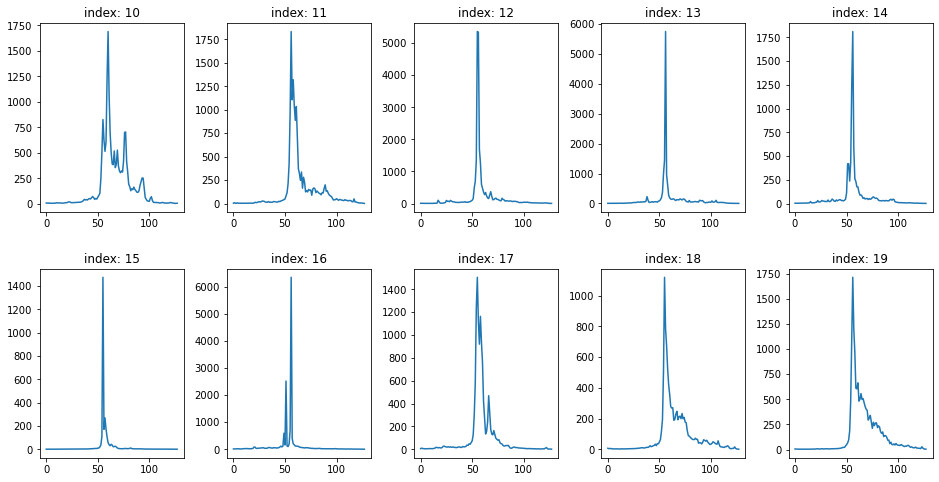

In [10]:
wf_sams = wf_records["waveform_20_ku"]
wf_label = np.full(shape= wf_sams.shape[0], fill_value=np.nan)
fig = plt.figure(figsize=(16, 8))
i_th = 1        ## !!!the condition required: i_th*10+10 <= wf_sams.shape[0]
for i, ind in enumerate(range(i_th*10, i_th*10+10)):   ## manually labeling for per 10 footprints.
    if ind >= wf_sams.shape[0]:
        continue
    ax = plt.subplot(2, 5, i+1)
    ax.plot(wf_sams[ind])
    plt.title('index: '+ str(ind))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

wf_num = [0,1,2,3,4,5,6,7,8,9]
wf_label[i_th*10: i_th*10+10] = [1,0,1,0,0,0,0,0,0,0]
# wf_label


### Save the labeled waveform data

In [12]:
wf_records['waveform_label'] = (['time_20_ku'], wf_label)
wf_records['waveform_label'].attrs['name'] = 'waveform labels, 1 represents ocean-like waveform and 0 represents noisy waveform'
# wf_records
# wf_records.to_netcdf(path='data/dset-waveform/dset_waveform.nc')

